In [1]:
# package imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#define the data
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
## checking datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 21 columns):
Unnamed: 0                 519700 non-null int64
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
duration_min               519700 non-null float64
start_date                 519700 non-null object
start_hour                 519700 non-null int64
day                        519700 non-nu

In [4]:
#read data
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour,day,month,year,weekday
0,0,80110,16:57:39.654000,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,-122.415929,96,Customer,1335.0,2020-05-20,16,20,5,2020,Wednesday
1,1,78800,15:56:34.842000,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,-122.426614,88,Customer,1313.0,2020-05-20,15,20,5,2020,Wednesday
2,2,45768,22:45:48.411000,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,-122.267764,1094,Customer,763.0,2020-05-20,22,20,5,2020,Wednesday
3,3,62172,17:31:10.636000,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,-122.408445,2831,Customer,1036.0,2020-05-20,17,20,5,2020,Wednesday
4,4,43603,14:23:14.001000,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,-122.265896,3167,Subscriber,727.0,2020-05-20,14,20,5,2020,Wednesday


In [5]:
num_col=list(df.select_dtypes(exclude=['object']))

In [6]:
#no. of columns
num_col

['Unnamed: 0',
 'duration_sec',
 'start_station_id',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'duration_min',
 'start_hour',
 'day',
 'month',
 'year']

In [7]:
df.isnull().sum()

Unnamed: 0                 0
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
duration_min               0
start_date                 0
start_hour                 0
day                        0
month                      0
year                       0
weekday                    0
dtype: int64

In [8]:
# check for  in the data
df.shape[0]

519700

In [9]:
# check for duplicates in the data
(df.duplicated()).sum()

0

Above shows the results,in the dataset does not have any duplicate values

In [10]:
## changing dates from object to timestamp 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [11]:
## Checking what columns has null values
df.isna().sum()

Unnamed: 0                 0
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
duration_min               0
start_date                 0
start_hour                 0
day                        0
month                      0
year                       0
weekday                    0
dtype: int64

The above data obtained is a final dataset, with no NULL values 

In [12]:
# assign new labels to columns in dataframe
df1 = df.copy()
df1.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour,day,month,year,weekday
0,0,80110,2020-05-20 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,-122.415929,96,Customer,1335.0,2020-05-20,16,20,5,2020,Wednesday
1,1,78800,2020-05-20 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,-122.426614,88,Customer,1313.0,2020-05-20,15,20,5,2020,Wednesday
2,2,45768,2020-05-20 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,-122.267764,1094,Customer,763.0,2020-05-20,22,20,5,2020,Wednesday
3,3,62172,2020-05-20 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,-122.408445,2831,Customer,1036.0,2020-05-20,17,20,5,2020,Wednesday
4,4,43603,2020-05-20 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,-122.265896,3167,Subscriber,727.0,2020-05-20,14,20,5,2020,Wednesday


In [13]:
#converting sec to min
df1['duration_min'] = round(df1['duration_sec'] / 60 ,0)

In [14]:
# separating date and time in start_date
df1['start_date'] = pd.to_datetime(df1['start_time']).dt.date
df1['start_time'] = pd.to_datetime(df1['start_time']).dt.time

# extracting hour from time
df1['start_hour'] = df1['start_time'].apply(lambda r:r.hour).astype(int)

In [15]:
# separating day,month for start_date
df1['start_date'] =  pd.to_datetime(df1['start_date'], format='%Y-%m-%d')
df1['day'] = df1['start_date'].apply(lambda r:r.day).astype(int)
df1['month'] = df1['start_date'].apply(lambda r:r.month).astype(int)
df1['year'] = df1['start_date'].apply(lambda r:r.year).astype(int)

In [16]:
# extracting weekday
df1['weekday'] = df1['start_date'].dt.weekday_name

In [17]:
df1.head(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour,day,month,year,weekday
0,0,80110,16:57:39.654000,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,-122.415929,96,Customer,1335.0,2020-05-20,16,20,5,2020,Wednesday
1,1,78800,15:56:34.842000,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,-122.426614,88,Customer,1313.0,2020-05-20,15,20,5,2020,Wednesday
2,2,45768,22:45:48.411000,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,-122.267764,1094,Customer,763.0,2020-05-20,22,20,5,2020,Wednesday
3,3,62172,17:31:10.636000,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,-122.408445,2831,Customer,1036.0,2020-05-20,17,20,5,2020,Wednesday
4,4,43603,14:23:14.001000,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,-122.265896,3167,Subscriber,727.0,2020-05-20,14,20,5,2020,Wednesday
5,5,9226,22:51:00.918000,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),...,-122.395282,1487,Customer,154.0,2020-05-20,22,20,5,2020,Wednesday
6,6,4507,23:49:28.422000,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,...,-122.299371,3539,Customer,75.0,2020-05-20,23,20,5,2020,Wednesday
7,7,4334,23:46:37.196000,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,...,-122.400876,1503,Customer,72.0,2020-05-20,23,20,5,2020,Wednesday
8,8,4150,23:37:07.548000,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),...,-122.399051,3125,Customer,69.0,2020-05-20,23,20,5,2020,Wednesday
9,9,4238,23:35:38.145000,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),...,-122.399051,2543,Customer,71.0,2020-05-20,23,20,5,2020,Wednesday


In [18]:
## save this for later
df1.to_csv("2017-fordgobike-tripdata.csv", index=False)

## Univariant Exploration Data

In [19]:
#confirm correction by rechecking for missing values in the data
df1.isna().sum()

Unnamed: 0                 0
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
duration_min               0
start_date                 0
start_hour                 0
day                        0
month                      0
year                       0
weekday                    0
dtype: int64

In [20]:
# Number of Unique Bikes uses
df1['bike_id'].nunique()

3673

In [21]:
# average trip time in minutes
round(df1['duration_min'].mean(),5)

18.31688

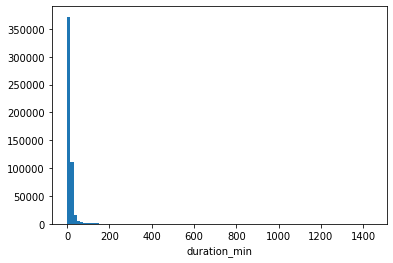

In [22]:
## checking distribution of duration
bin_edges = np.arange(0, df['duration_min'].max()+10, 15)
sns.distplot(df['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

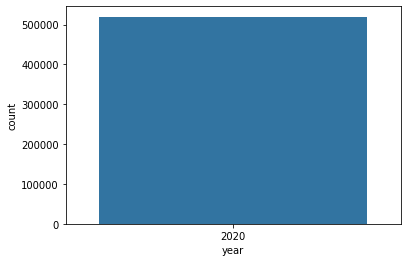

In [23]:
sns.countplot(data = df1, x = "year" );

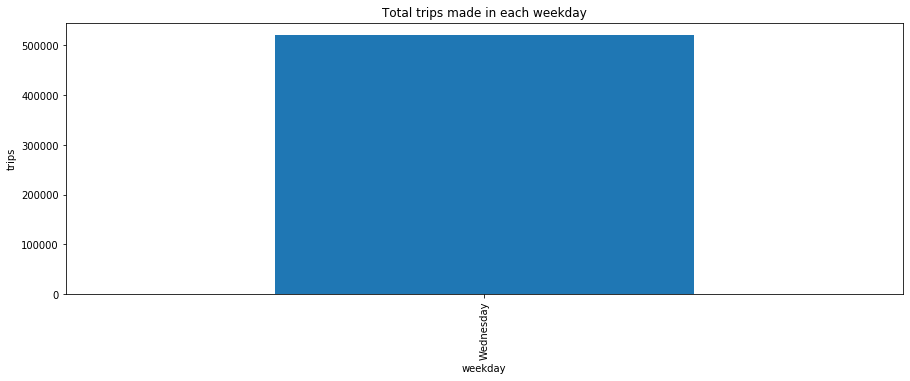

In [24]:
# Trend of bike trips 
group_by_day = df1.groupby('weekday').count()

group_by_day['bike_id'].plot(kind='bar' ,figsize = (15,5) )
plt.xlabel('weekday')
plt.ylabel('trips')
plt.title('Total trips made in each weekday')
plt.show()

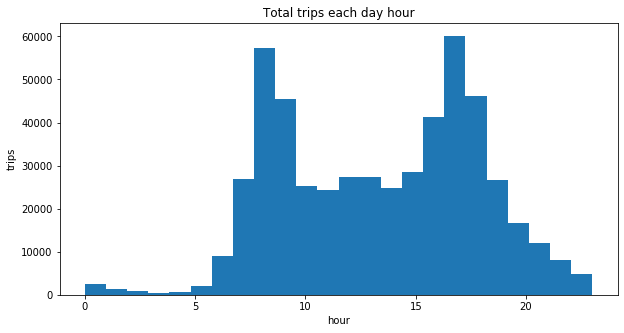

In [25]:

df1['start_hour'].plot(kind = 'hist', bins = 24, figsize = (10,5) )

plt.xlabel('hour')
plt.ylabel('trips')
plt.title('Total trips each day hour')
plt.show()

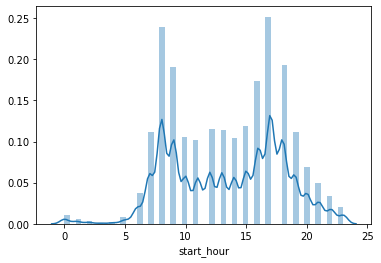

In [26]:
#Kernel density estimation is one way of estimating the probability density function of a variable
sns.distplot(df['start_hour'])

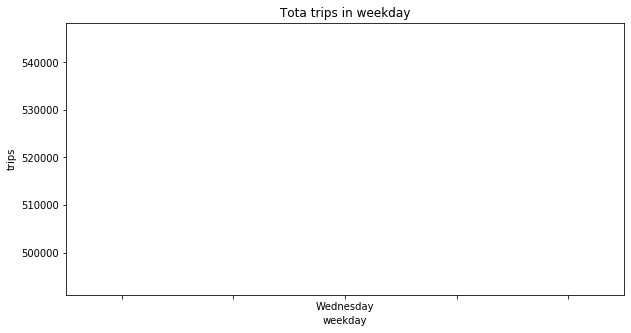

In [27]:
# Here comparing between weekdays trip
group_by_day = df1.groupby('weekday').count()

group_by_day['bike_id'].plot(kind='line' ,figsize = (10,5) )
plt.xlabel('weekday')
plt.ylabel('trips')
plt.title('Tota trips in weekday')
plt.show()

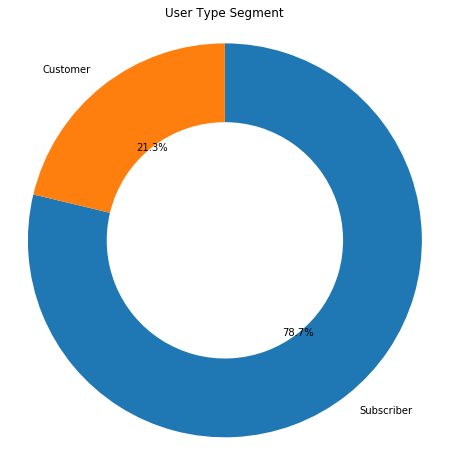

In [28]:
 # In the piechart showing percentage of customers and subscribers out of total
plt.figure(figsize = [15, 8])
sorted_counts = df1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.1f%%');
plt.title("User Type Segment")
plt.axis('square');

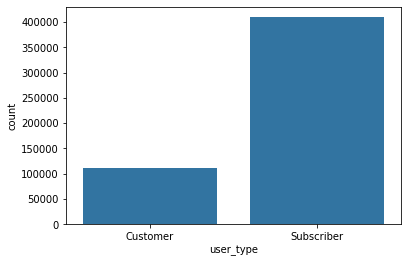

In [29]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'user_type', color = base_color)

# Bivariant Exploration

In [30]:
df1.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour,day,month,year,weekday
0,0,80110,16:57:39.654000,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,-122.415929,96,Customer,1335.0,2020-05-20,16,20,5,2020,Wednesday
1,1,78800,15:56:34.842000,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,-122.426614,88,Customer,1313.0,2020-05-20,15,20,5,2020,Wednesday
2,2,45768,22:45:48.411000,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,-122.267764,1094,Customer,763.0,2020-05-20,22,20,5,2020,Wednesday
3,3,62172,17:31:10.636000,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,-122.408445,2831,Customer,1036.0,2020-05-20,17,20,5,2020,Wednesday
4,4,43603,14:23:14.001000,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,-122.265896,3167,Subscriber,727.0,2020-05-20,14,20,5,2020,Wednesday


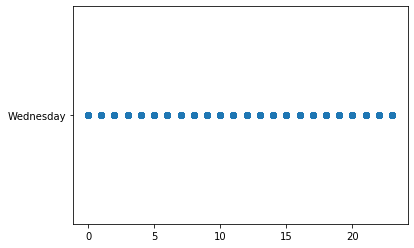

In [31]:
plt.scatter(data = df, x = 'start_hour', y = 'weekday')

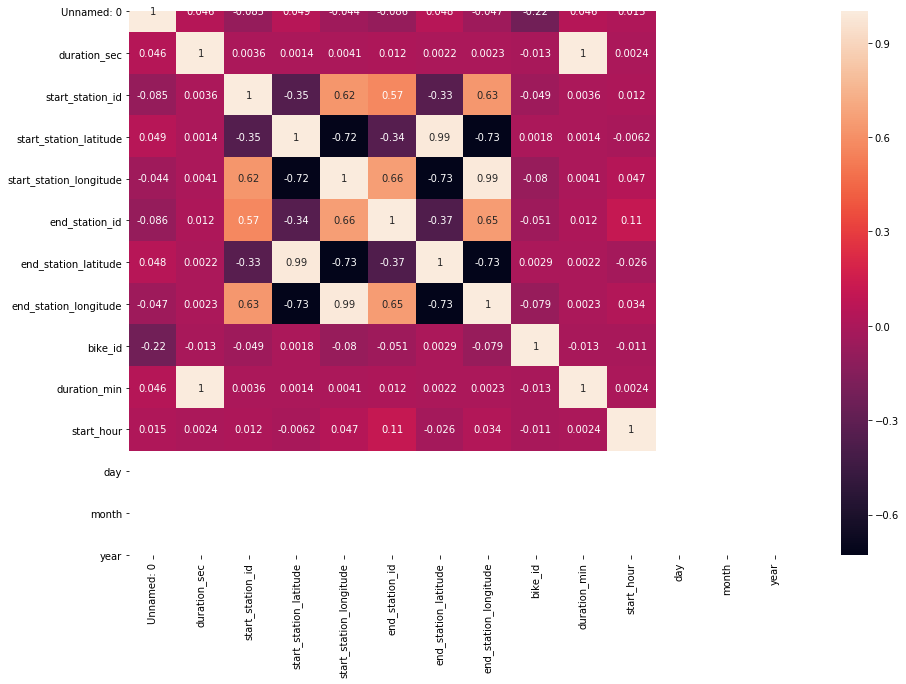

In [36]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

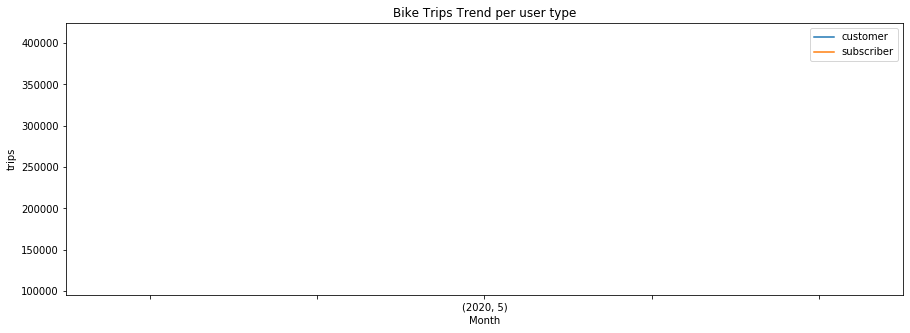

In [37]:
customer = df1[df1['user_type'] == 'Customer']
subscriber = df1[df1['user_type'] == 'Subscriber']

group_by_date_cust = customer.groupby([customer["start_date"].dt.year, customer["start_date"].dt.month]).count()
group_by_date_sub = subscriber.groupby([subscriber["start_date"].dt.year, subscriber["start_date"].dt.month]).count()

group_by_date_cust['bike_id'].plot(kind='line' ,figsize = (15,5) )
group_by_date_sub['bike_id'].plot(kind='line' ,figsize = (15,5) )

plt.xlabel('Month')
plt.ylabel('trips')
plt.legend(('customer' , 'subscriber'))
plt.title('Bike Trips Trend per user type')
plt.show()

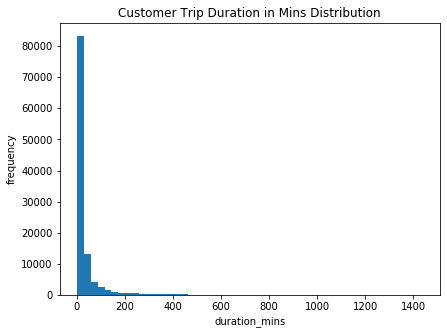

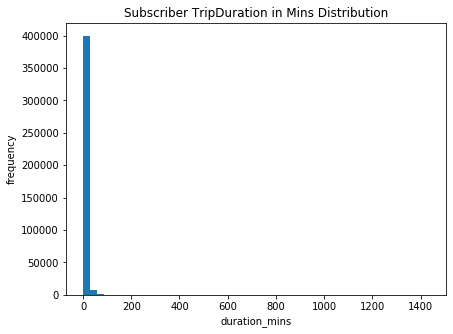

In [38]:
plt.subplot(1, 2, 1)

customer['duration_min'].plot(kind = 'hist', bins = 50 , figsize = (15,5) )

plt.xlabel('duration_mins')
plt.ylabel('frequency')
plt.title('Customer Trip Duration in Mins Distribution')
plt.show()

plt.subplot(1, 2, 2)

subscriber['duration_min'].plot(kind = 'hist', bins = 50 , figsize = (15,5) )

plt.xlabel('duration_mins')
plt.ylabel('frequency')
plt.title('Subscriber TripDuration in Mins Distribution')
plt.show()

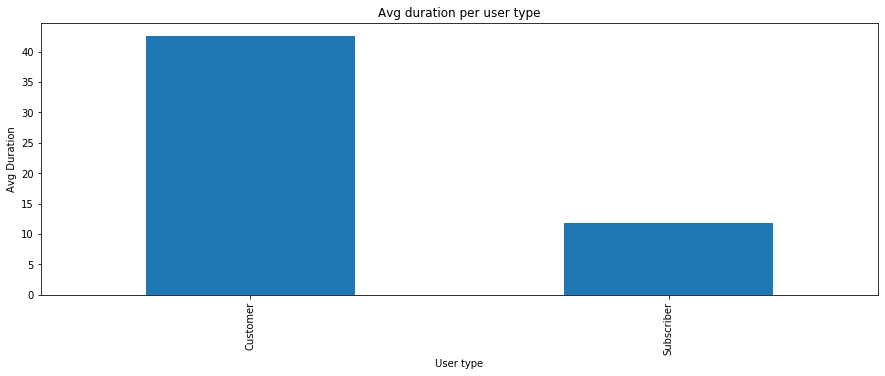

In [40]:
group_by_user = df1.groupby(df1["user_type"]).mean()

group_by_user['duration_min'].plot(kind='bar' ,figsize = (15,5) )

plt.xlabel('User type')
plt.ylabel('Avg Duration')
plt.title('Avg duration per user type')
plt.show()

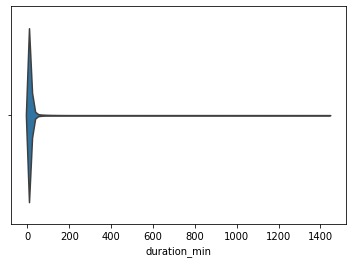

In [67]:
base_color = sns.color_palette()[0]
sns.violinplot(data = df1, x = 'duration_min', color = base_color,
              inner = None)

(-187.49712736122774, 1555.3911614005804)

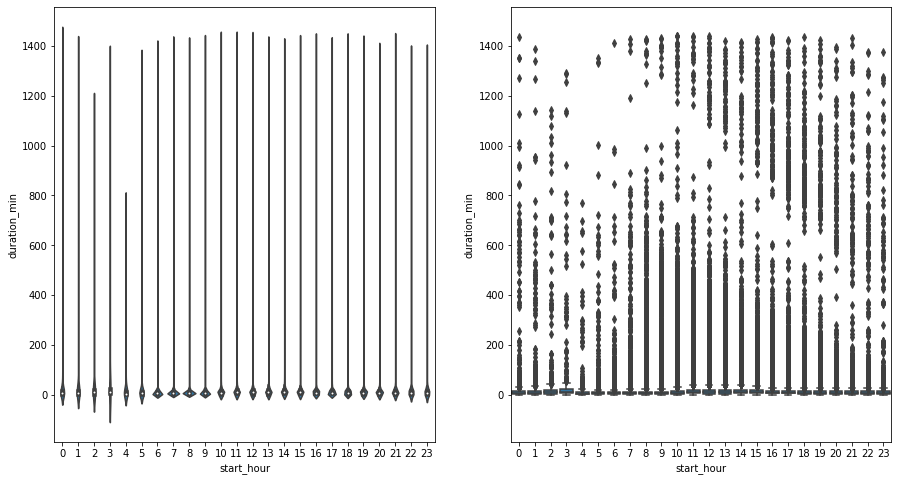

In [56]:
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df1, x = 'start_hour', y = 'duration_min', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df1, x = 'start_hour', y = 'duration_min', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# Multivariate Exploration

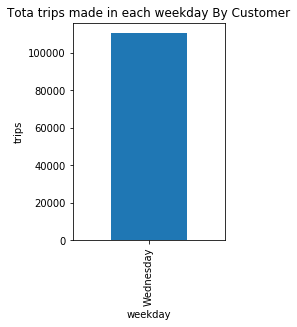

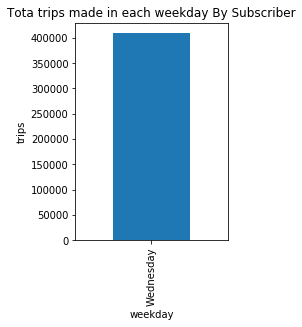

In [64]:
group_by_day_cust = customer.groupby('weekday').count()
group_by_day_sub = subscriber.groupby('weekday').count()

plt.subplot(1, 2, 1)
group_by_day_cust['bike_id'].plot(kind='bar')
plt.xlabel('weekday')
plt.ylabel('trips')
plt.title('Tota trips made in each weekday By Customer')
plt.show()

plt.subplot(1, 2, 2)
group_by_day_sub['bike_id'].plot(kind='bar' )
plt.xlabel('weekday')
plt.ylabel('trips')
plt.title('Tota trips made in each weekday By Subscriber')
plt.show()

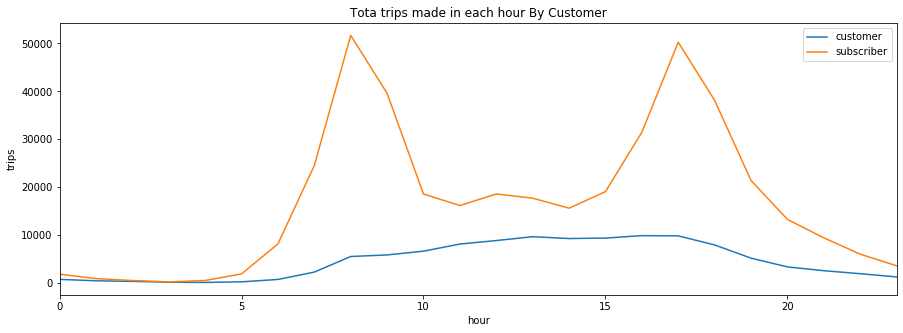

In [63]:
group_by_day_cust = customer.groupby('start_hour').count()
group_by_day_sub = subscriber.groupby('start_hour').count()


group_by_day_cust['bike_id'].plot(kind='line' , figsize = (15,5))
group_by_day_sub['bike_id'].plot(kind='line', figsize = (15,5) )

plt.xlabel('hour')
plt.ylabel('trips')
plt.legend(('customer' , 'subscriber'))
plt.title('Tota trips made in each hour By Customer')
plt.show()